- *PREPROCESSING*

In [14]:
import pandas as pd
# file = candidates_clean+.csv
PREFERENZE = pd.read_csv("C:/Users/al3ss/Desktop/europee_2019/data/preferences.csv")


# Removing the first column
PREFERENZE = PREFERENZE.iloc[:, 1:]

# Changing column names
old_names = ['circoscrizione', 'regione', 'provincia', 'comune', 'descrlista','votilista', 'cognome', 'nome', 'datanascita', 'luogonascita', 'sesso','PREFERENZE', 'CODTIPOELETTO']
new_names = ["CIRCOSCRIZIONE", "REGIONE", "PROVINCIA", "COMUNE", "LISTA", "VOTILISTA", "COGNOME", "NOME", "DATANASCITA", "LUOGONASCITA", "SESSO", "PREFERENZE", "ELETTO"]
PREFERENZE.columns = new_names

# Converting PREFERENZE and VOTILISTA to numeric
PREFERENZE["VOTILISTA"] = pd.to_numeric(PREFERENZE["VOTILISTA"], errors='coerce')
PREFERENZE["PREFERENZE"] = pd.to_numeric(PREFERENZE["PREFERENZE"], errors='coerce')

# Add Europarlamentare Column
# Lista dei nomi e cognomi degli europarlamentari
nomi_europarlamentari = {
("ALDO", "PATRICIELLO"),
("ALESSANDRA", "BASSO"),
("ALESSANDRA", "MORETTI"),
("ALESSANDRO", "PANZA"),
("ANDREA", "CAROPPO"),
("ANDREA", "COZZOLINO"),
("ANGELO", "CIOCCA"),
("ANNA", "BONFRISCO"),
("ANNALISA", "TARDINO"),
("ANTONIO MARIA", "RINALDI"),
("ANTONIO", "TAJANI"),
("BRANDO MARIA", "BENIFEI"),
("CARLO", "CALENDA"),
("CARLO", "FIDANZA"),
("CATERINA", "CHINNICI"),
("CHIARA MARIA", "GEMMA"),
("DANIELA", "RONDINELLI"),
("DANILO OSCAR", "LANCINI"),
("DAVID MARIA", "SASSOLI"),
("DINO RICCARDO MARIA", "GIARRUSSO"),
("ELENA", "LIZZI"),
("ELEONORA", "EVI"),
("ELISABETTA", "GUALMINI"),
("FABIO MASSIMO", "CASTALDO"),
("FRANCESCA", "DONATO"),
("FRANCO", "ROBERTI"),
("FULVIO", "MARTUSCIELLO"),
("GIANANTONIO", "DA RE"),
("GIANNA", "GANCIA"),
("GIULIANO", "PISAPIA"),
("GIUSEPPE", "FERRANDINO"),
("GIUSEPPE", "MILAZZO"),
("GIUSEPPINA", "PICIERNO"),
("HERBERT", "DORFMANN"),
("IGNAZIO", "CORRAO"),
("IRENE", "TINAGLI"),
("ISABELLA", "ADINOLFI"),
("ISABELLA", "TOVAGLIERI"),
("LAURA", "FERRARA"),
("LUCIA", "VUOLO"),
("LUISA", "REGIMENTI"),
("MARA", "BIZZOTTO"),
("MARCO", "CAMPOMENOSI"),
("MARCO", "DREOSTO"),
("MARCO", "ZANNI"),
("MARCO", "ZULLO"),
("MARIO", "FURORE"),
("MASSIMILIANO", "SALINI"),
("MASSIMILIANO", "SMERIGLIO"),
("MASSIMO", "CASANOVA"),
("MATTEO", "ADINOLFI"),
("NICOLA", "PROCACCINI"),
("PAOLO", "BORCHIA"),
("PAOLO", "DE CASTRO"),
("PATRIZIA FERMA FRANCESCA", "TOIA"),
("PIERFRANCESCO", "MAJORINO"),
("PIERNICOLA", "PEDICINI"),
("PIETRO", "BARTOLO"),
("PIETRO", "FIOCCHI"),
("RAFFAELE", "FITTO"),
("RAFFAELE", "STANCANELLI"),
("ROBERTO", "GUALTIERI"),
("ROSA", "D'AMATO"),
("ROSANNA", "CONTE"),
("SABRINA", "PIGNEDOLI"),
("SALVATORE", "DE MEO"),
("SERGIO ANTONIO", "BERLATO"),
("SILVIA SERAFINA", "SARDONE"),
("SILVIO", "BERLUSCONI"),
("SIMONA", "BONAFE'"),
("SIMONA RENATA", "BALDASSARRE"),
("STEFANIA", "ZAMBELLI"),
("SUSANNA", "CECCARDI"),
("TIZIANA", "BEGHIN"),
("VALENTINO", "GRANT"),
("VINCENZO", "SOFO")}
# Crea un DataFrame per gli europarlamentari
df_europarlamentari = pd.DataFrame(nomi_europarlamentari, columns=["NOME", "COGNOME"])
df_europarlamentari['EUROPARLAMENTARE'] = 'S'
# Esegui il merge per aggiungere la colonna EUROPARLAMENTARE
PREFERENZE= pd.merge(PREFERENZE, df_europarlamentari, on=["NOME", "COGNOME"], how="left")

# Imposta 'N' per i valori NaN (che indicano non europarlamentari)
PREFERENZE['EUROPARLAMENTARE'] = PREFERENZE['EUROPARLAMENTARE'].fillna('N')

PREFERENZE.head()

,CIRCOSCRIZIONE,REGIONE,PROVINCIA,COMUNE,LISTA,VOTILISTA,COGNOME,NOME,DATANASCITA,LUOGONASCITA,SESSO,PREFERENZE,ELETTO,EUROPARLAMENTARE
0,iii : italia centrale,toscana,massa carrara,tresana,EUROPA VERDE,17,ZIMARRI,UMBERTO,12/19/89 00:00:00,frosinone,M,0,N,N
1,iii : italia centrale,toscana,massa carrara,tresana,EUROPA VERDE,17,ARMELLINI,CECILIA,06/25/60 00:00:00,firenze,F,1,N,N
2,iii : italia centrale,toscana,massa carrara,tresana,+EUROPA - ITALIA IN COMUNE - PDE ITALIA,15,BONINO,EMMA,03/09/48 00:00:00,bra,F,2,N,N
3,iii : italia centrale,toscana,massa carrara,tresana,+EUROPA - ITALIA IN COMUNE - PDE ITALIA,15,TARADASH,MARCO,05/19/50 00:00:00,livorno,M,0,N,N
4,iii : italia centrale,toscana,massa carrara,tresana,+EUROPA - ITALIA IN COMUNE - PDE ITALIA,15,HERMANIN DE REICHENFELD,COSTANZA,06/02/81 00:00:00,firenze,F,0,N,N


- *SOME INFORMATION*

In [15]:
# CANDIDATES: Keep only 'NOME', 'COGNOME', 'LUOGONASCITA'
CANDIDATI = PREFERENZE[["COGNOME", "NOME", "LUOGONASCITA"]].drop_duplicates()
print("CANDIDATI TOTALI:\t " + str((CANDIDATI.shape)[0]))  # Should print (940, 3)

# COMMUNI: Keep only "PROVINCIA", "COMUNE"
COMUNI = PREFERENZE[["PROVINCIA", "COMUNE"]].drop_duplicates()
print("COMUNI TOTALI: \t\t" + str(((COMUNI.shape)[0])))  # Should print (7915, 2)
print()
# N preferenze
N = PREFERENZE['PREFERENZE'].sum()
print("PREFERENZE TOTALI:  " + str(N) + ", DI CUI:")
# PREFERENZE PER CIRCOSCRIZIONE
PREFERENZE_CIRCOSCRIZIONE = (PREFERENZE.groupby(["CIRCOSCRIZIONE"])
                  .agg(PREFERENZE_CIRCOSCRIZIONE=("PREFERENZE", "sum"))
                  .reset_index())
N_PREFERENZE_ITALIA_NORD_OCCIDENTALE = PREFERENZE_CIRCOSCRIZIONE.iloc[0, 1]
P1= round(((N_PREFERENZE_ITALIA_NORD_OCCIDENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_NORD_ORIENTALE= PREFERENZE_CIRCOSCRIZIONE.iloc[1, 1]
P2= round(((N_PREFERENZE_ITALIA_NORD_ORIENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_CENTRALE = PREFERENZE_CIRCOSCRIZIONE.iloc[2, 1]
P3= round(((N_PREFERENZE_ITALIA_CENTRALE/ N) * 100),2)
N_PREFERENZE_ITALIA_MERIDIONALE = PREFERENZE_CIRCOSCRIZIONE.iloc[3, 1]
P4= round(((N_PREFERENZE_ITALIA_MERIDIONALE/ N) * 100),2)
N_PREFERENZE_ITALIA_INSULARE = PREFERENZE_CIRCOSCRIZIONE.iloc[4, 1]
P5= round(((N_PREFERENZE_ITALIA_INSULARE/ N) * 100),2)
print("I\tPREFERENZE ITALIA NORD OCCIDENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_OCCIDENTALE) + "\t(" + str(P1) + "%)")
print("II\tPREFERENZE ITALIA NORD ORIENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_ORIENTALE) + "\t(" + str(P2) + "%)")
print("III\tPREFERENZE ITALIA CENTRALE:\t\t" + str(N_PREFERENZE_ITALIA_CENTRALE) + "\t(" + str(P3) + "%)")
print("IV\tPREFERENZE ITALIA MERIDIONALE:\t\t" + str(N_PREFERENZE_ITALIA_MERIDIONALE) + "\t(" + str(P4) + "0%)")
print("V\tPREFERENZE ITALIA INSULARE:\t\t" + str(N_PREFERENZE_ITALIA_INSULARE)+ "\t(" + str(P5) + "%)")

PREFERENZE_PARTITI = (PREFERENZE.groupby(["LISTA"])
                  .agg(PREFERENZE_PARTITI =("PREFERENZE", "sum"))
                  .reset_index())
PREFERENZE_PARTITI = PREFERENZE_PARTITI.sort_values(by="PREFERENZE_PARTITI", ascending=False)

print()
print("DI QUESTE PREFERENZE:")

altri = N
for i, partito in enumerate(PREFERENZE_PARTITI["LISTA"]):
    if i == 5:
        perc = "\t( " + str(round(altri/N * 100,2)) + "%)"
        print("-\t"+ "ALTRI < 3%:" + "\t\t\t" + str(altri) + perc)
        break
    pref = PREFERENZE_PARTITI.iloc[i, 1]
    altri -=  PREFERENZE_PARTITI.iloc[i, 1]
    fract = (PREFERENZE_PARTITI.iloc[i, 1]/N)* 100
    perc = str()
    if partito == "FRATELLI D'ITALIA":  perc = "\t( " + str(round(fract,2)) + "%)" 
    else: perc = "\t(" + str(round(fract,2)) + "%)"
    tab = "\t\t"
    if partito == "FORZA ITALIA" :tab= "\t\t\t"

    

    print("-\t"+ partito + ":" + tab + str(pref) + perc)
    


CANDIDATI TOTALI:	 940
COMUNI TOTALI: 		7915

PREFERENZE TOTALI:  13031492, DI CUI:
I	PREFERENZE ITALIA NORD OCCIDENTALE:	2678652	(20.56%)
II	PREFERENZE ITALIA NORD ORIENTALE:	2400039	(18.42%)
III	PREFERENZE ITALIA CENTRALE:		2538376	(19.48%)
IV	PREFERENZE ITALIA MERIDIONALE:		3466253	(26.60%)
V	PREFERENZE ITALIA INSULARE:		1948172	(14.95%)

DI QUESTE PREFERENZE:
-	LEGA SALVINI PREMIER:		4020919	(30.86%)
-	PARTITO DEMOCRATICO:		3689015	(28.31%)
-	FORZA ITALIA:			1551813	(11.91%)
-	MOVIMENTO 5 STELLE:		1432662	(10.99%)
-	FRATELLI D'ITALIA:		1209773	( 9.28%)
-	ALTRI < 3%:			1127310	( 8.65%)


- *VIUSALIZZAZIONE CANDIDATI PER CIRCOSCRIZIONE ATTRAVERSO DIAGRAMMI DI PARETO*

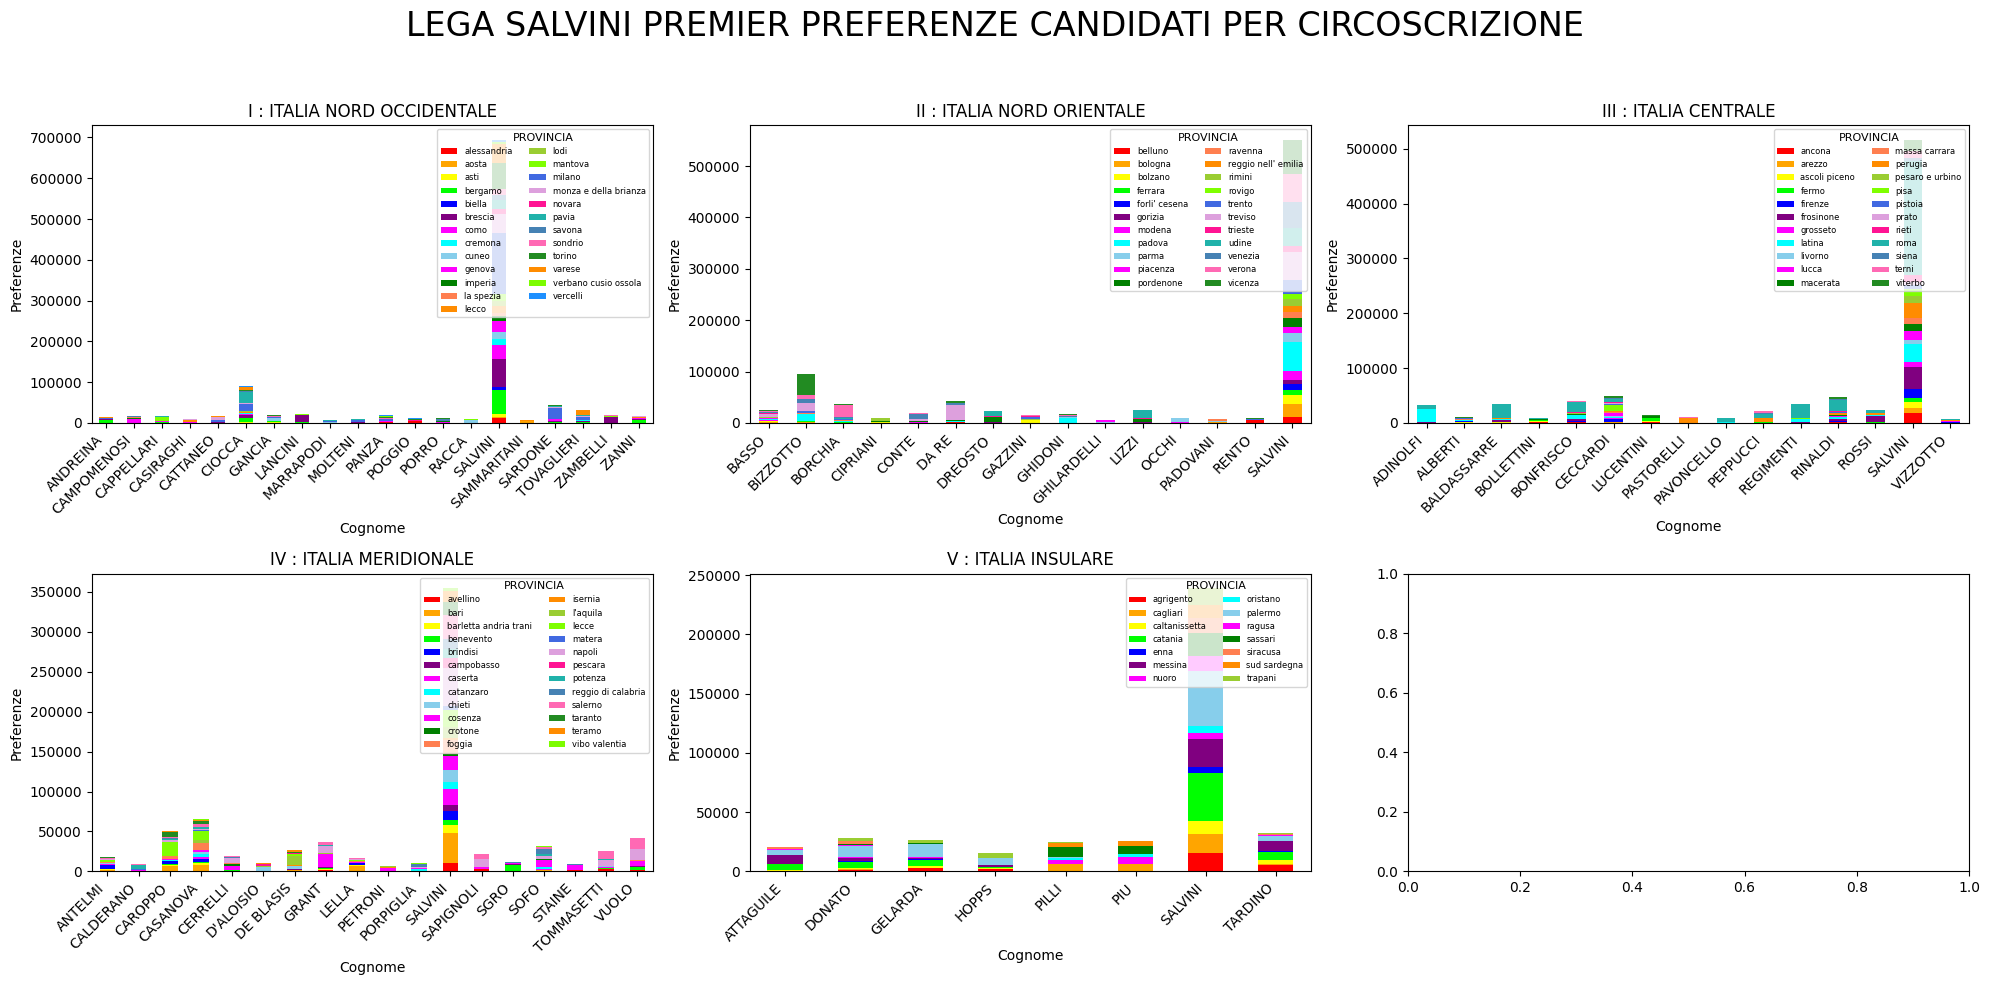

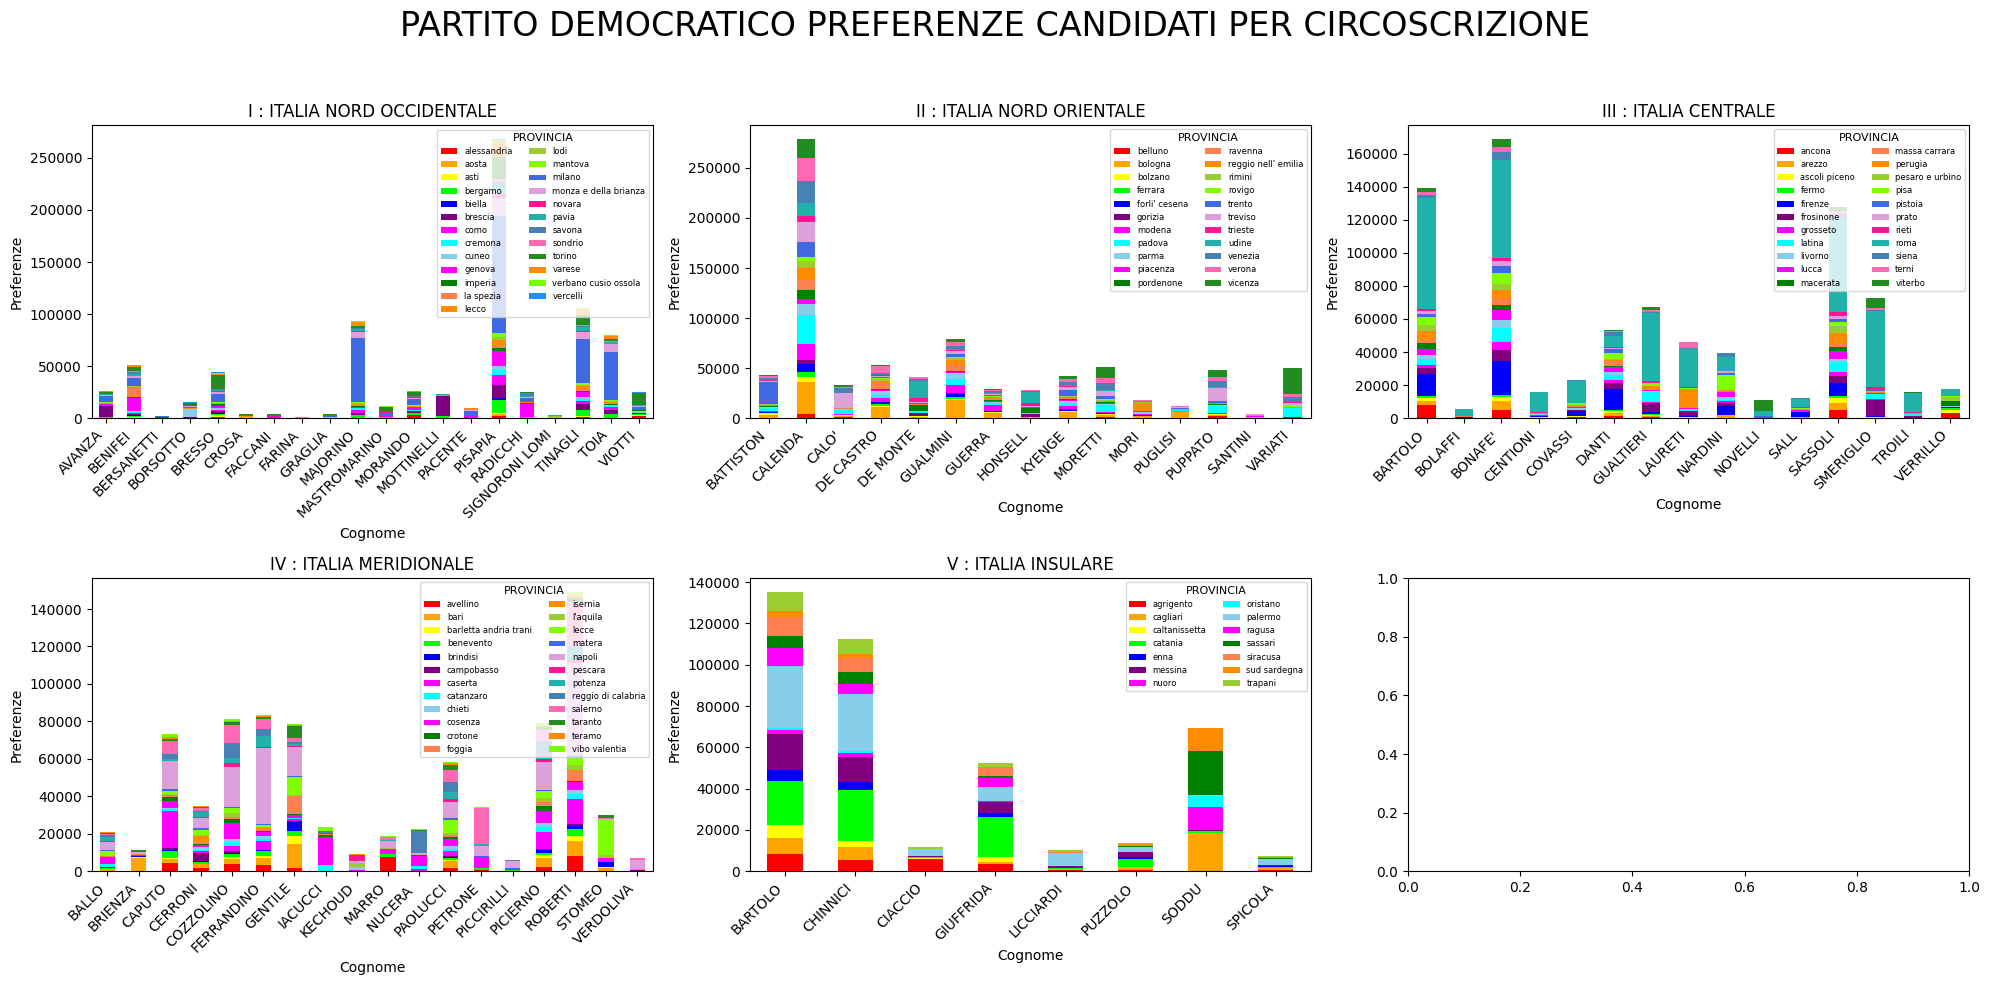

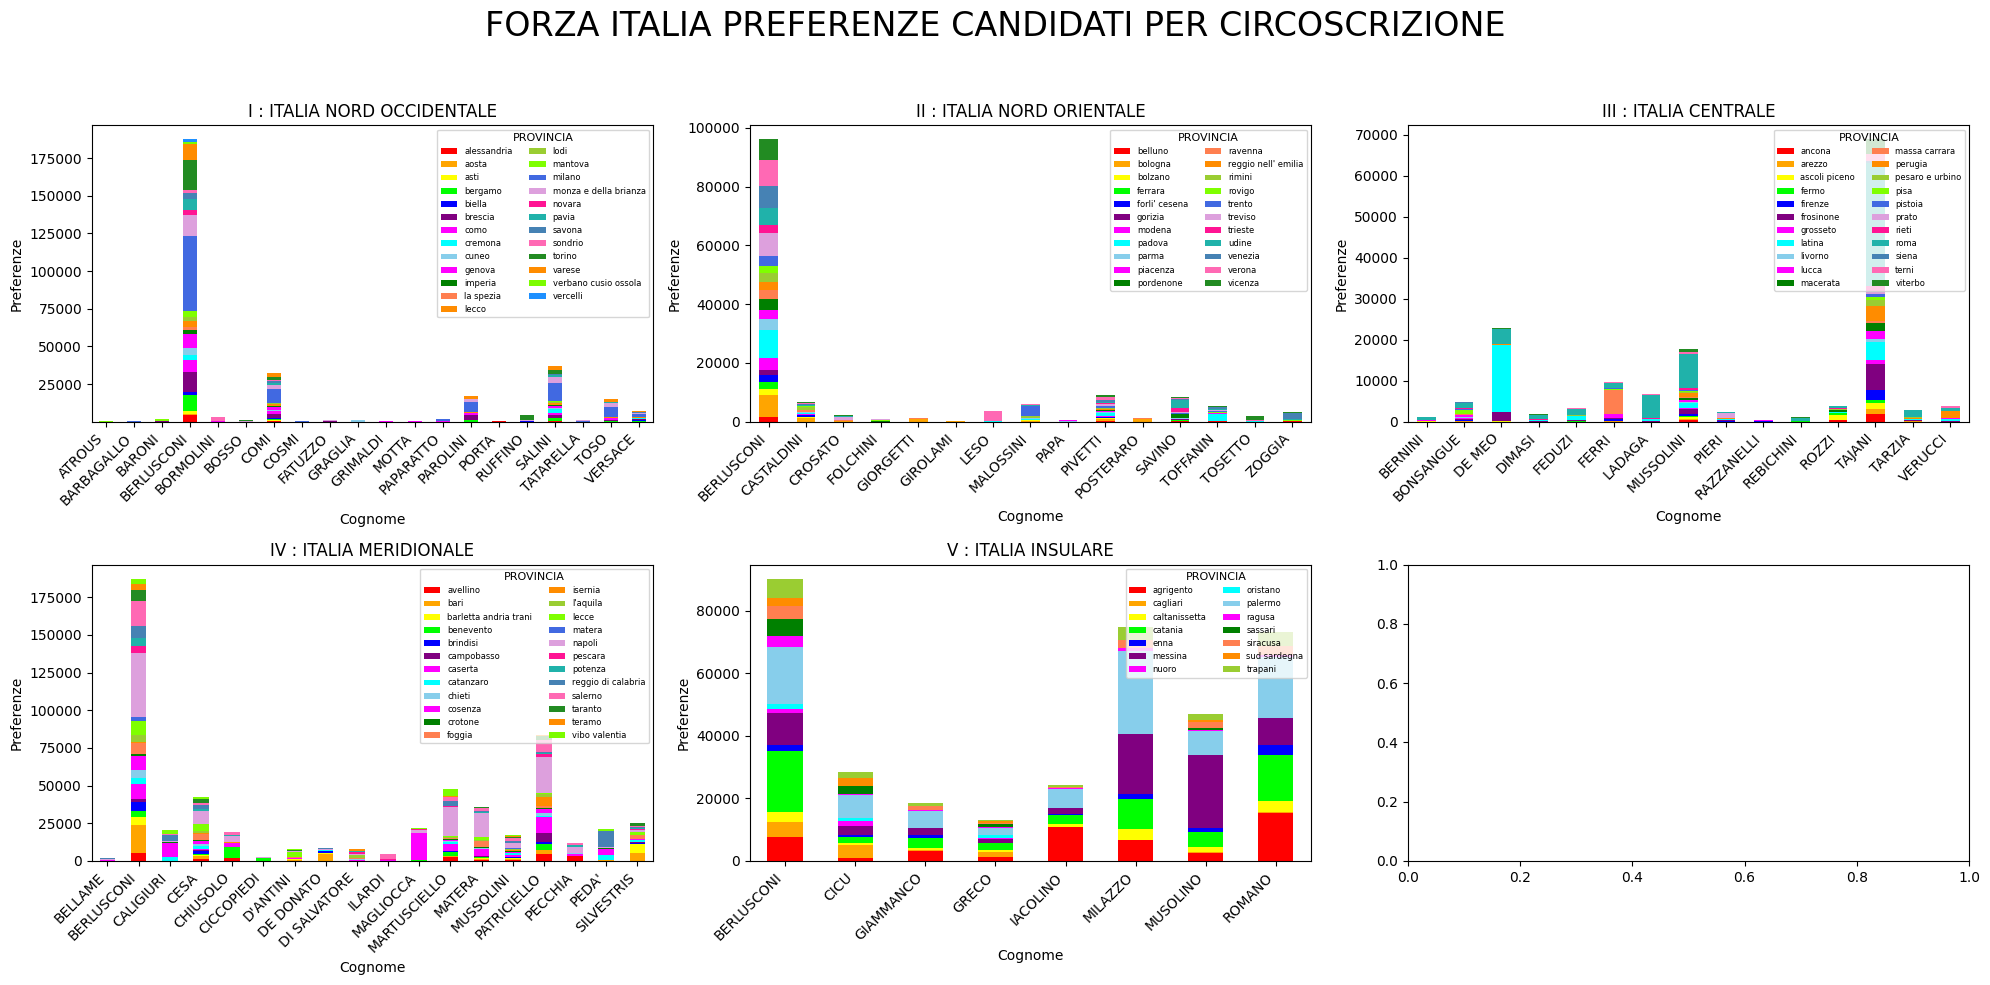

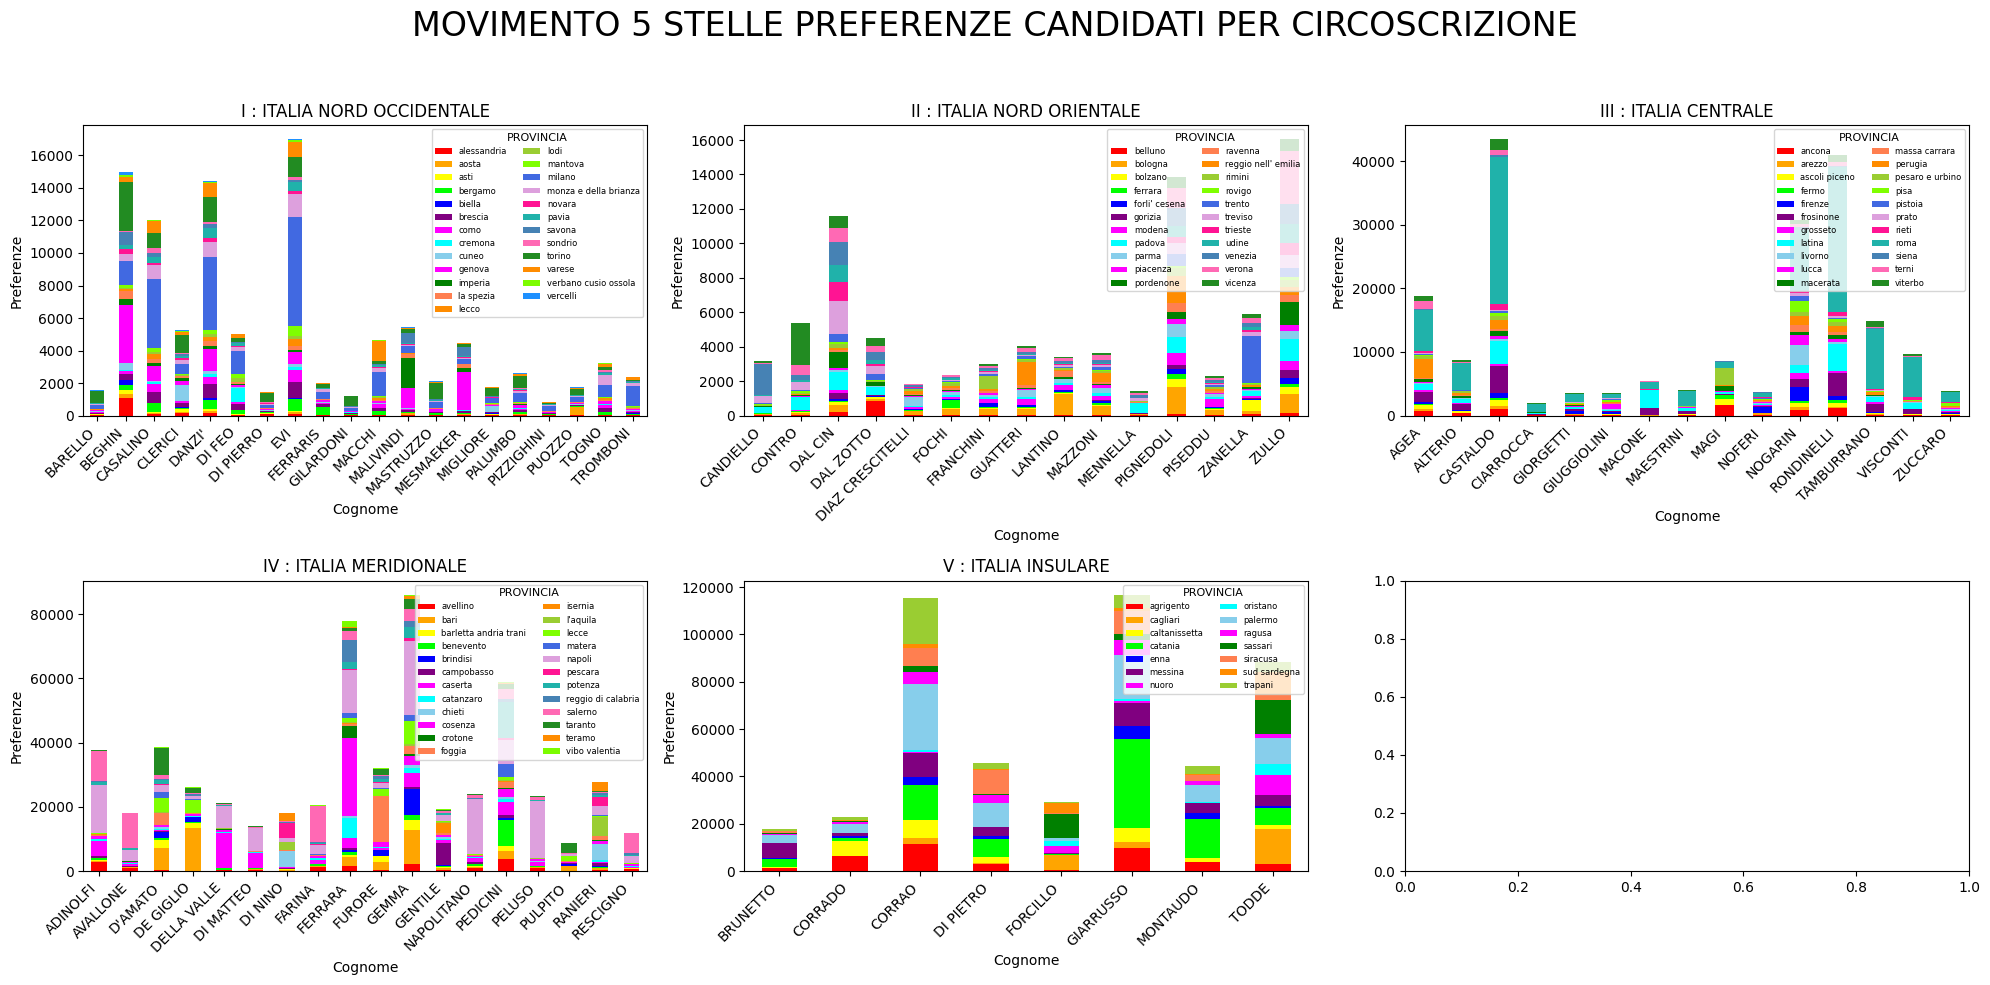

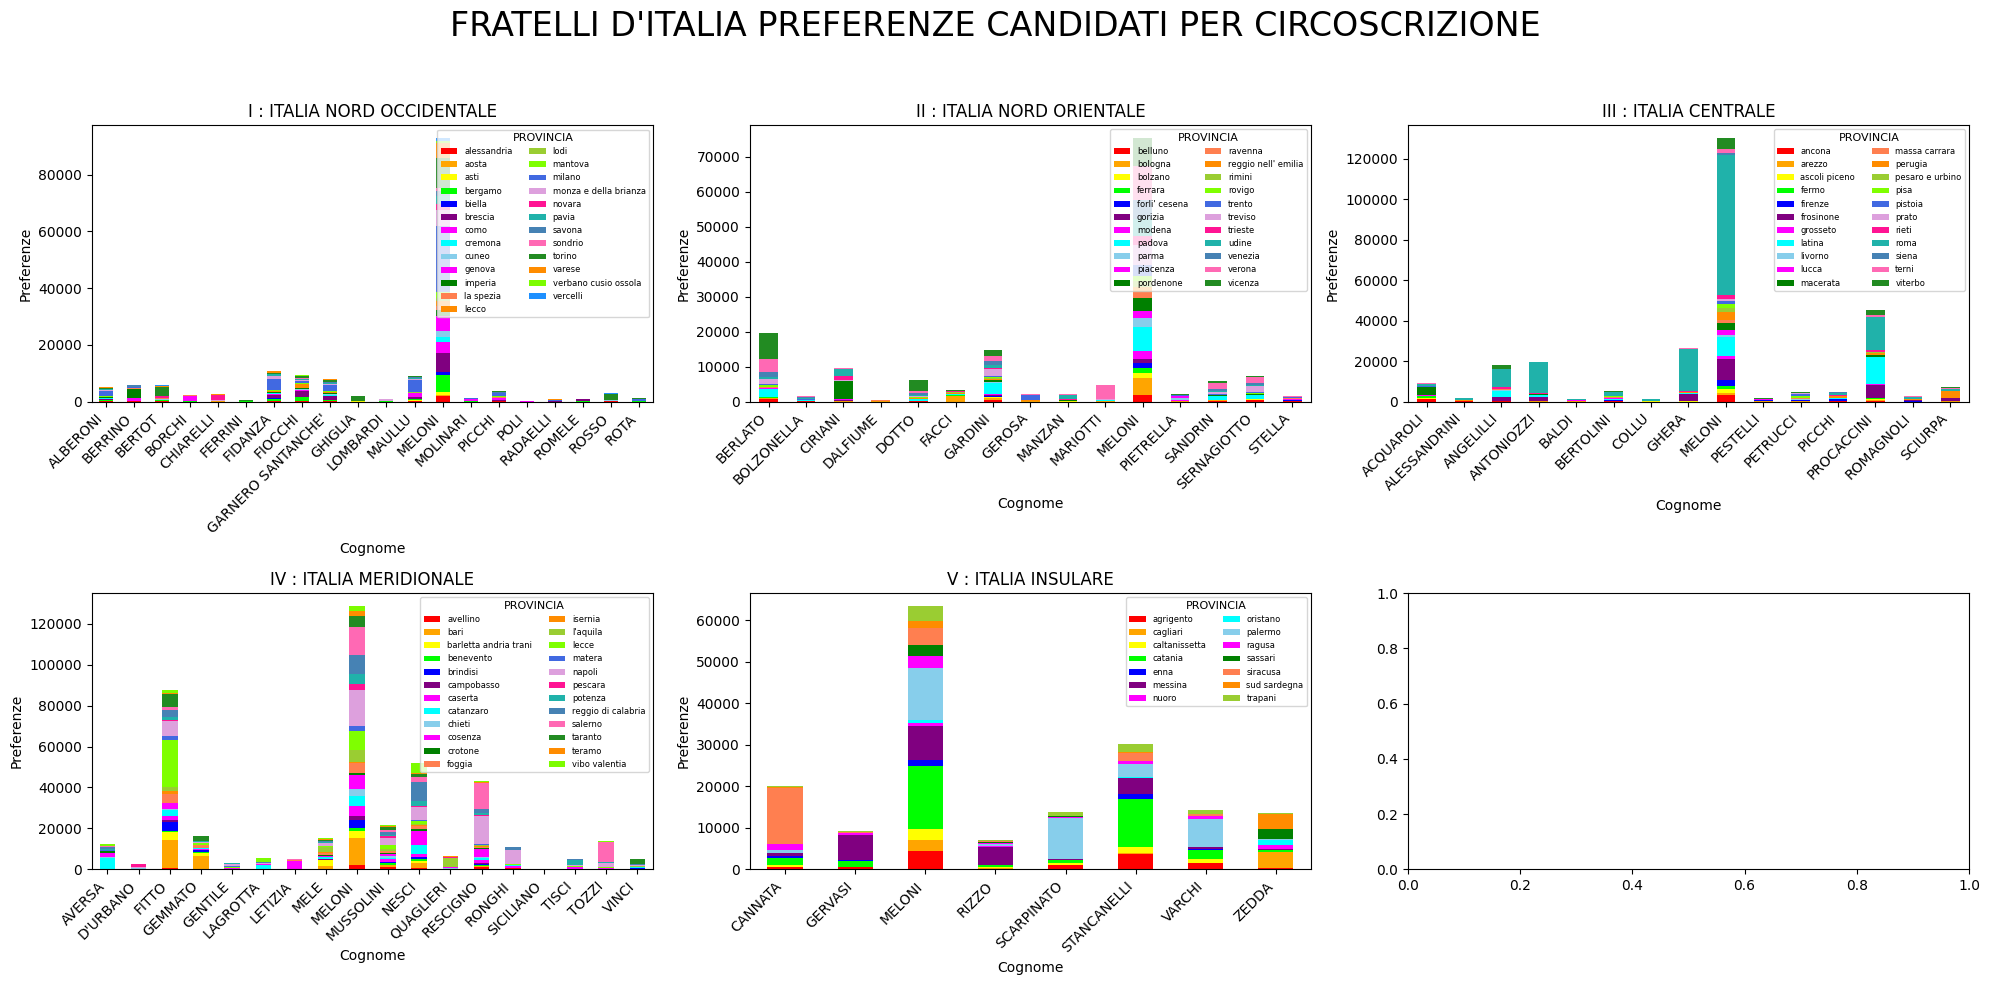

In [16]:
import matplotlib.pyplot as plt

partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]
circoscrizioni = ['i : italia nord occidentale', 'ii : italia nord orientale', 'iii : italia centrale', 'iv : italia meridionale', 'v : italia insulare']

# Iterazione su ogni partito
for i, partito in enumerate(partiti):
    PREFERENZE_LISTA = PREFERENZE[PREFERENZE['LISTA'] == partito]
    # Creazione della figura con subplot
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(partito + " PREFERENZE CANDIDATI PER CIRCOSCRIZIONE", fontsize=24)
    # Dizionario per subplots
    D = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1)}

    # Iterazione su ogni circoscrizione
    for j, circoscrizione in enumerate(circoscrizioni):
        COLORS = ['red', 'orange', 'yellow', 'lime', 'blue', 'purple', 'magenta', 'cyan', 'skyblue', 'fuchsia', 'green', 'coral', 'darkorange', 'yellowgreen', 'chartreuse', 'royalblue', 'plum', 'deeppink', 'lightseagreen', 'steelblue', 'hotpink', 'forestgreen', 'darkorange', 'lawngreen', 'dodgerblue', 'tomato', 'lightsalmon', 'mediumseagreen', 'lightblue', 'orangered']
        PREFERENZE_LISTA_CIRCOSCRIZIONE = PREFERENZE_LISTA[PREFERENZE_LISTA['CIRCOSCRIZIONE'] == circoscrizione]
        # Aggregazione delle preferenze per cognome
        PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE = (PREFERENZE_LISTA_CIRCOSCRIZIONE.groupby(["PROVINCIA", "NOME", "COGNOME", "ELETTO", "EUROPARLAMENTARE"])
                 .agg(PREFERENZE_PROVINCIA=("PREFERENZE", "sum"))
                 .reset_index())
        
        # Ordinamento decrescente per preferenze
        PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE = PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE.sort_values(by='PREFERENZE_PROVINCIA', ascending=False)
        
        # Creazione del pivot table con ordine di cognome basato sulle preferenze
        PIVOT = PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE.pivot_table(index='COGNOME', columns='PROVINCIA', values='PREFERENZE_PROVINCIA', aggfunc='sum')
        
        # Plot ordinato
        ax = axs[D[j]]
        PIVOT.plot(kind='bar', stacked=True, color=COLORS[:PIVOT.shape[1]], ax=ax)
        
        # Aggiunta di etichette e titolo
        ax.set_xlabel('Cognome')
        ax.set_ylabel('Preferenze')
        ax.set_title(circoscrizione.upper())
        ax.set_xticklabels(PIVOT.index, rotation=45, ha='right')
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2, fontsize=6, title="PROVINCIA", title_fontsize=8, markerscale=0.3)
    # Layout finale
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



- *VISUALIZZAZIONE CON LA MAPPA*

c:\Users\al3ss\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\al3ss\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "SALVINI

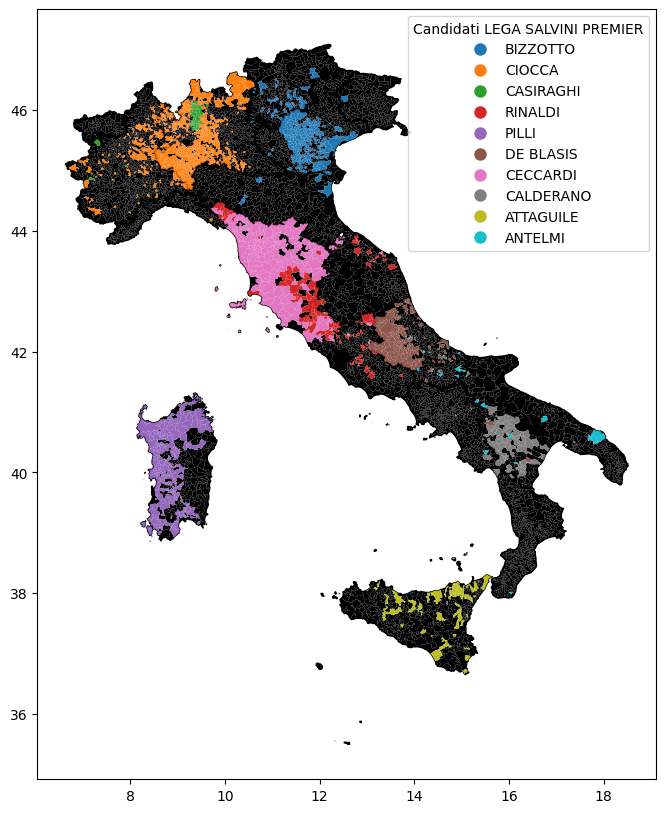

C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


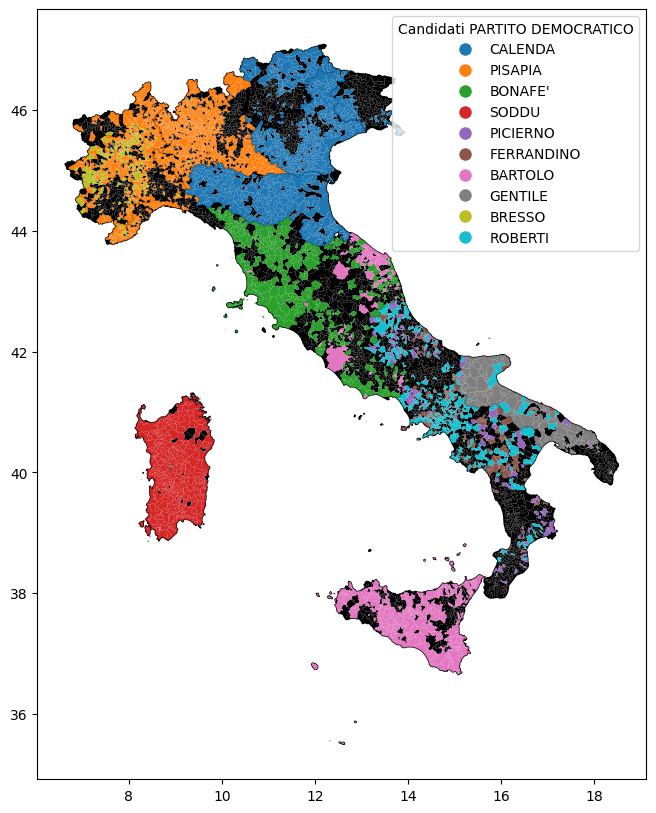

C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


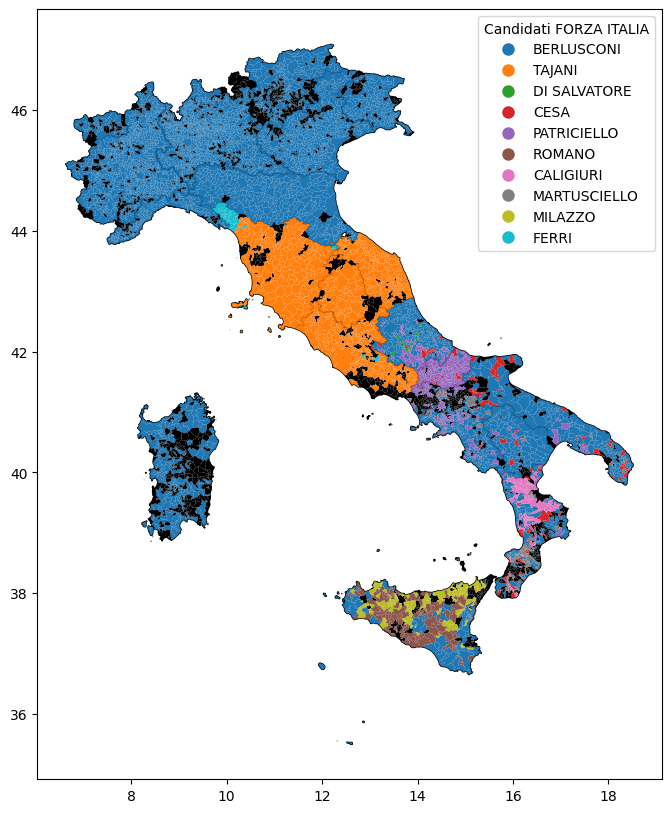

C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


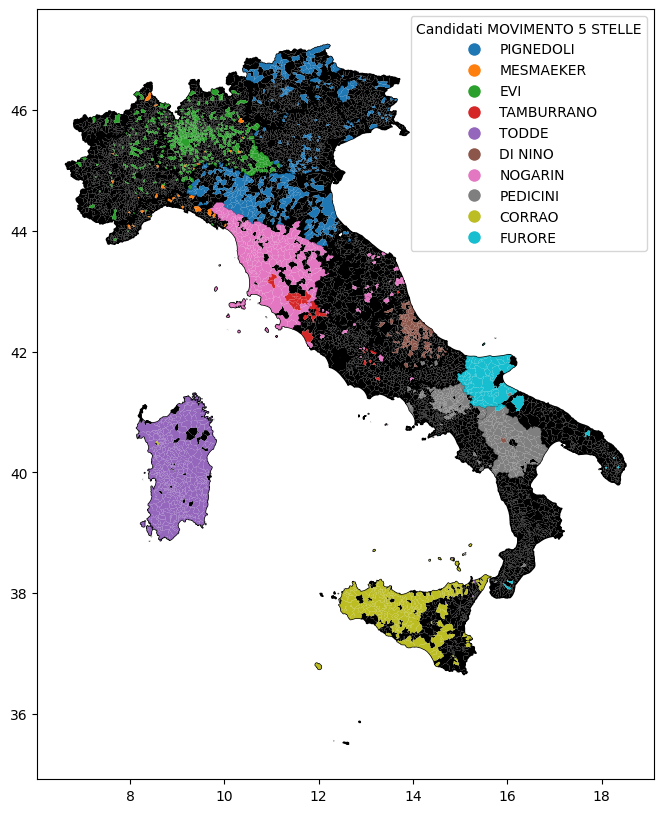

C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "MELONI"]
C:\Users\al3ss\AppData\Local\Temp\ipykernel_20780\1374848121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


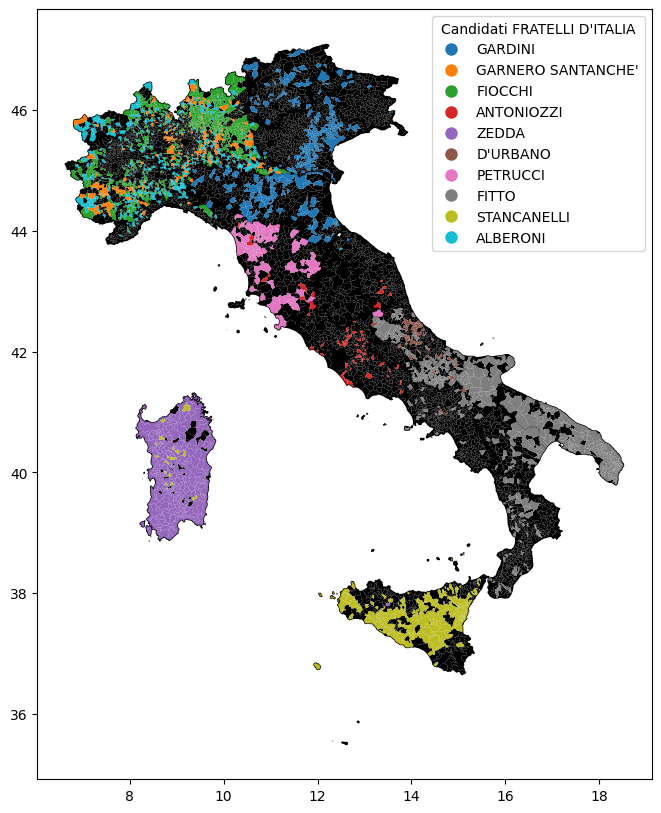

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]

# 1. Carica i dati geografici
# Regioni
df_regions = gpd.read_file("C:/Users/al3ss/Desktop/europee_2019/data/Limiti01012019_g/Reg01012019_g/Reg01012019_g_WGS84.shp").to_crs({'init': 'epsg:4326'})
# Comuni
df_comuni = gpd.read_file("C:/Users/al3ss/Desktop/europee_2019/data/Limiti01012019_g/Com01012019_g/Com01012019_g_WGS84.shp").to_crs({'init': 'epsg:4326'})

for partito in partiti:
    # 2. Filtra per il partito di interesse
    preferenze_partito = PREFERENZE[PREFERENZE['LISTA'] == partito]

    if partito == "LEGA SALVINI PREMIER":
        preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "SALVINI"]
    if partito == "FRATELLI D'ITALIA":
        preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "MELONI"]

    # 3. Trova il candidato più votato in ogni comune
    most_voted_person = preferenze_partito.loc[preferenze_partito.groupby('COMUNE')['PREFERENZE'].idxmax()]

    # 4. Creare un DataFrame con le informazioni necessarie
    most_voted_person_info = most_voted_person [['COMUNE', 'NOME', 'COGNOME', 'PREFERENZE', 'ELETTO', 'EUROPARLAMENTARE']]

    # 5. Unisci i dati geografici con i comuni
    df_comuni['COMUNE'] = df_comuni['COMUNE'].str.lower()
    most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()

    merged = df_comuni.set_index('COMUNE').join(most_voted_person_info.set_index('COMUNE'))

    # 6. Definisci i colori per ciascun candidato
    candidates_colors = {cognome: color for cognome, color in zip(most_voted_person_info['COGNOME'].unique(), mcolors.TABLEAU_COLORS)}

    # Funzione per assegnare il colore
    def assign_color(row):
        
        if row['COGNOME'] in candidates_colors:
            return candidates_colors[row['COGNOME']] # Colore in base al nome del candidato eletto
        else:
            return 'black'  # Nero per i non eletti

    # Aggiungi la colonna 'COLOR' con il colore appropriato
    merged['COLOR'] = merged.apply(assign_color, axis=1)

    # 7. Visualizzazione della mappa
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot della mappa delle regioni italiane
    df_regions.plot(ax=ax, edgecolor='black', color='none')

    # Plot dei comuni con marker proporzionali ai voti ricevuti e colorati
    for color in merged['COLOR'].unique():
        subset = merged[merged['COLOR'] == color]
        subset.plot(ax=ax, marker='o', color=color, 
                    markersize=subset['PREFERENZE'] / 100, 
                    label=color)

    # Aggiungi una legenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name)
            for name, color in candidates_colors.items()]
    plt.legend(title="Candidati"+ " " + partito, handles=handles)

    # Mostra la mappa
    plt.show()

- *RAPPRESENTAZIONE CON I GRAFI*

In [18]:
#Riscrivere il codice


*"(COMUNE DI NACITA CANDIDATO ∈ CIRCOSTRIZIONE |  CANDIDATO)"*


Per calcolare la probabilità P(A∣B)P(A∣B) utilizzando un DataFrame con informazioni sui candidati e il loro luogo di nascita, puoi seguire questi passaggi:

1. Definisci il problema:
- A: Il candidato è nato in una determinata circoscrizione (circoscrizione di interesse).
- B: Il candidato appartiene a un certo partito (partito di interesse).


2. Assumiamo che il DataFrame contenga almeno queste colonne:
- Comune_di_nascita: Il comune di nascita del candidato.
- Circoscrizione: La circoscrizione elettorale del candidato.
- Partito: Il partito politico del candidato.


3. Calcola le probabilità:
- P(A): Probabilità che un candidato sia nato nella circoscrizione di interesse.
- P(B): Probabilità che un candidato appartenga al partito di interesse.
- P(B∣A): Probabilità che un candidato appartenente alla circoscrizione di interesse appartenga al partito di interesse.

In [19]:
CANDIDATI = PREFERENZE[['CIRCOSCRIZIONE','COGNOME','NOME','LUOGONASCITA']]
CANDIDATI = CANDIDATI.drop_duplicates()
CANDIDATI.head()



,CIRCOSCRIZIONE,COGNOME,NOME,LUOGONASCITA
0,iii : italia centrale,ZIMARRI,UMBERTO,frosinone
1,iii : italia centrale,ARMELLINI,CECILIA,firenze
2,iii : italia centrale,BONINO,EMMA,bra
3,iii : italia centrale,TARADASH,MARCO,livorno
4,iii : italia centrale,HERMANIN DE REICHENFELD,COSTANZA,firenze
